# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name: Ethan Mikel

Student UT EID: etm693

---

Partner Name: David Paul Salinas

Partner UT EID: dps2387

---

Date Created:

Date Last Modified:

---

Totoal Points 20. 



## Supprt Vector Machine 

In [70]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [71]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [128]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

heart_df = pd.read_csv("Heart.csv")
X = heart_df[['Age', 'Sex', 'Chol']]
y = heart_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[18 11]
 [15 17]]

Classification Report:
              precision    recall  f1-score   support

          No       0.55      0.62      0.58        29
         Yes       0.61      0.53      0.57        32

    accuracy                           0.57        61
   macro avg       0.58      0.58      0.57        61
weighted avg       0.58      0.57      0.57        61



# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [129]:
accuracy = accuracy_score(y_test, y_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nModel Accuracy: {accuracy:.2f}")
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Model Accuracy: 0.57

Precision: 0.61
Recall: 0.53
F1 Score: 0.57


# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



Iteration 0, Cost: 1.0
Iteration 10, Cost: 0.9989223343098814
Iteration 20, Cost: 0.9978446686197627
Iteration 30, Cost: 0.9967670029296442
Iteration 40, Cost: 0.9956893372395255
Iteration 50, Cost: 0.9946116715494069
Iteration 60, Cost: 0.9935340058592882
Iteration 70, Cost: 0.9924563401691696
Iteration 80, Cost: 0.991378674479051
Iteration 90, Cost: 0.9903010087889323


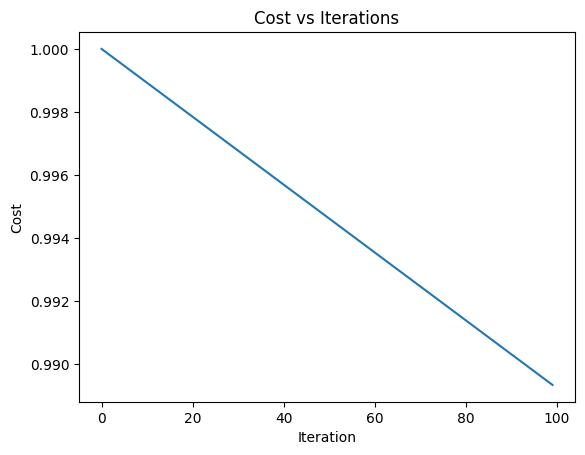

Accuracy: 0.31353135313531355
Precision: 0.5628019323671497
Recall: 0.5611510791366906
F1 Score: 0.2286401925391095


In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

heart_df["ChestPain"] = heart_df["ChestPain"].astype("category").cat.codes
heart_df["Thal"] = heart_df["Thal"].astype("category").cat.codes
heart_df["Target"] = heart_df["Target"].astype("category").cat.codes
X = (heart_df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].values - np.mean(heart_df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].values, axis=0)) / np.std(heart_df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].values, axis=0)
y = heart_df["Target"].values

# Initialize parameters
w, learning_rate, max_iter = np.zeros(X.shape[1]), 0.001, 100
cost_history = []

# Gradient descent
for i in range(max_iter):
    margin = y * np.dot(X, w)
    dw = -np.dot((y * (margin < 1)).T, X) / len(y)
    w -= learning_rate * dw
    cost_history.append(np.mean(np.maximum(0, 1 - margin)))
    if i % 10 == 0:
        print(f"Iteration {i}, Cost: {cost_history[-1]}")

# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Predictions and Evaluation
y_pred = np.sign(np.dot(X, w))
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"Precision: {precision_score(y, y_pred, average='macro', zero_division=1)}")
print(f"Recall: {recall_score(y, y_pred, average='macro', zero_division=1)}")
print(f"F1 Score: {f1_score(y, y_pred, average='macro', zero_division=1)}")


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Custom SVM
print("\nCustom SVM (from scratch) Results:")
print(f"Accuracy: {accuracy_custom_svm:.2f}")
print(f"Precision: {precision_score(y, y_pred_custom_svm, average='macro', zero_division=1):.2f}")
print(f"Recall: {recall_score(y, y_pred_custom_svm, average='macro', zero_division=1):.2f}")
print(f"F1 Score: {f1_score(y, y_pred_custom_svm, average='macro', zero_division=1):.2f}")

# Library SVM 
print("\nLibrary SVM Results:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro', zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro', zero_division=1):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='macro', zero_division=1):.2f}")

# Logistic Regression
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro', zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro', zero_division=1):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='macro', zero_division=1):.2f}")


Custom SVM (from scratch) Results:
Accuracy: 0.31
Precision: 0.56
Recall: 0.56
F1 Score: 0.23

Library SVM Results:
Accuracy: 0.57
Precision: 0.58
Recall: 0.58
F1 Score: 0.57

Logistic Regression Results:
Accuracy: 0.57
Precision: 0.58
Recall: 0.58
F1 Score: 0.57


The Library SVM and Logistic Regression models both performed similarly well, achieving an accuracy of 0.57 and an F1 score of 0.57. In contrast, the Custom SVM model, implemented from scratch, underperformed with an accuracy of only 0.31 and a much lower F1 score of 0.23. Overall, the Library SVM and Logistic Regression models are more reliable and effective for this classification task.




# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [137]:
heart_df["ChestPain"] = heart_df["ChestPain"].astype("category").cat.codes
heart_df["Thal"] = heart_df["Thal"].astype("category").cat.codes
heart_df["Target"] = heart_df["Target"].astype("category").cat.codes

features = ["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]
X = heart_df[features].values
y = heart_df["Target"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)  # 'gamma' can be set to 'scale' or 'auto'
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RBF kernel: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy with RBF kernel: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.83      0.62      0.71        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.76      0.74      0.73        61

